# Density of water #

In [100]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [84]:
def density(p, t) :
    
    aa = [6.824687741e03,-5.422063673e02,-2.096666205e04, 3.941286787e04, -6.733277739e04, 9.902381028e04,-1.093911774e05,
      8.590841667e04,-4.511168742e04, 1.418138926e04,-2.017271113e03, 7.982692717e00, -2.616571843e-2, 1.522411790e-3,
      2.284279054e-2, 2.421647003e02, 1.269716088e-10,2.074838328e-7, 2.174020350e-8, 1.105710498e-9, 1.293441934e01,
      1.308119072e-5, 6.047626338e-14]
    
    sa = [8.438375405e-1, 5.362162162e-4, 1.720000000e00, 7.342278489e-2, 4.975858870e-2, 6.537154300e-1, 1.150000000e-6,
      1.510800000e-5, 1.418800000e-1, 7.002753165e00, 2.995284926e-4, 2.040000000e-1]
    
    tc1 = 647.3
    pc1 = 2.212e7
    vc1 = 0.00317
    utc1 = 1./tc1
    upc1 = 1./pc1
    vc1mol = vc1*18.01534

    theta = (t+273.15)*utc1
    theta2x = theta*theta
    theta18 = theta**18.
    theta20 = theta18*theta2x

    beta = p*upc1
    beta2x = beta*beta
    beta4  = beta2x*beta2x
    
    yy = 1.-sa[0]*theta2x-sa[1]*theta**(-6.)
    xx = sa[2]*yy*yy-2.*(sa[3]*theta-sa[4]*beta)
    
    zz = yy + np.sqrt(xx)

    u0 = -5./17.
    u1 = aa[11]*sa[4]*(zz**u0)
    u2 = 1./(sa[7]+theta**11.)
    u3 = aa[17]+(2.*aa[18]+3.*aa[19]*beta)*beta
    u4 = 1./(sa[6]+theta18*theta)
    u5 = (sa[9]+beta)**(-4.)
    u6 = sa[10]-3.*u5
    u7 = aa[20]*theta18*(sa[8]+theta2x)
    u8 = aa[15]*(sa[5]-theta)**9.

    vr = u1+aa[12]+theta*(aa[13]+aa[14]*theta)+u8*(sa[5]-theta)+aa[16]*u4-u2*u3-u6*u7+(3.*aa[21]*(sa[11]-theta)
    +4.*aa[22]*beta/theta20)*beta2x

    dwmol = 1./(vr*vc1mol)
    dw = 1./(vr*vc1)
    
    return dw

In [120]:
pdata =np.linspace(1e6, 20e6,20)
tdata = np.linspace(1,300,281)

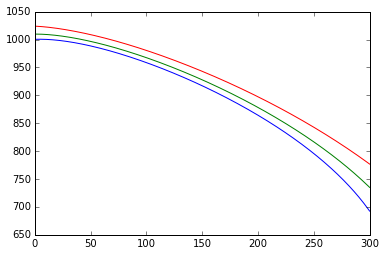

In [121]:
plt.plot(tdata, density(1e6, tdata))
plt.plot(tdata, density(20e6, tdata))
plt.plot(tdata, density(50e6, tdata))

In [124]:
1+(20.-1)/2*2

20.0